In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [6]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | porto velho
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | avera
Processing Record 4 of Set 1 | lixourion
Processing Record 5 of Set 1 | tuktoyaktuk
Processing Record 6 of Set 1 | isangel
Processing Record 7 of Set 1 | vanderhoof
Processing Record 8 of Set 1 | diego de almagro
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | lolua
City not found. Skipping...
Processing Record 12 of Set 1 | ponta do sol
Processing Record 13 of Set 1 | ryabovo
Processing Record 14 of Set 1 | upernavik
Processing Record 15 of Set 1 | carballo
Processing Record 16 of Set 1 | norman wells
Processing Record 17 of Set 1 | airai
Processing Record 18 of Set 1 | port lincoln
Processing Record 19 of Set 1 | lod
Processing Record 20 of Set 1 | cherskiy
Processing Record 21 of Set 1 | butaritari
Processing Record 22 of Set 1 | eisenhuttenst

Processing Record 32 of Set 4 | naze
Processing Record 33 of Set 4 | arrifes
Processing Record 34 of Set 4 | yumen
Processing Record 35 of Set 4 | kruisfontein
Processing Record 36 of Set 4 | saldanha
Processing Record 37 of Set 4 | srednekolymsk
Processing Record 38 of Set 4 | roma
Processing Record 39 of Set 4 | dikson
Processing Record 40 of Set 4 | haines junction
Processing Record 41 of Set 4 | san jose
Processing Record 42 of Set 4 | nefteyugansk
Processing Record 43 of Set 4 | yar-sale
Processing Record 44 of Set 4 | tuatapere
Processing Record 45 of Set 4 | karakendzha
City not found. Skipping...
Processing Record 46 of Set 4 | torbay
Processing Record 47 of Set 4 | henties bay
Processing Record 48 of Set 4 | arraial do cabo
Processing Record 49 of Set 4 | itainopolis
Processing Record 50 of Set 4 | kropotkin
Processing Record 1 of Set 5 | san patricio
Processing Record 2 of Set 5 | ha giang
Processing Record 3 of Set 5 | moose factory
Processing Record 4 of Set 5 | rincon
Proc

Processing Record 24 of Set 8 | kayerkan
Processing Record 25 of Set 8 | kyshtovka
Processing Record 26 of Set 8 | coquimbo
Processing Record 27 of Set 8 | adrar
Processing Record 28 of Set 8 | nanortalik
Processing Record 29 of Set 8 | barra
Processing Record 30 of Set 8 | aflu
City not found. Skipping...
Processing Record 31 of Set 8 | gizo
Processing Record 32 of Set 8 | alofi
Processing Record 33 of Set 8 | pangody
Processing Record 34 of Set 8 | povoa de varzim
Processing Record 35 of Set 8 | middletown
Processing Record 36 of Set 8 | hambantota
Processing Record 37 of Set 8 | bulolo
Processing Record 38 of Set 8 | pasighat
Processing Record 39 of Set 8 | zambezi
Processing Record 40 of Set 8 | kapuskasing
Processing Record 41 of Set 8 | ballaghaderreen
Processing Record 42 of Set 8 | surab
Processing Record 43 of Set 8 | niagara falls
Processing Record 44 of Set 8 | vertientes
Processing Record 45 of Set 8 | severo-kurilsk
Processing Record 46 of Set 8 | nyurba
Processing Record 

Processing Record 8 of Set 12 | asau
Processing Record 9 of Set 12 | maun
Processing Record 10 of Set 12 | paamiut
Processing Record 11 of Set 12 | asosa
Processing Record 12 of Set 12 | gobabis
Processing Record 13 of Set 12 | unity
Processing Record 14 of Set 12 | palitana
Processing Record 15 of Set 12 | belturbet
Processing Record 16 of Set 12 | nantucket
Processing Record 17 of Set 12 | hasaki
Processing Record 18 of Set 12 | baoding
Processing Record 19 of Set 12 | grajau
Processing Record 20 of Set 12 | itamaraju
Processing Record 21 of Set 12 | santa maria
Processing Record 22 of Set 12 | tarata
Processing Record 23 of Set 12 | los llanos de aridane
Processing Record 24 of Set 12 | jarjis
City not found. Skipping...
Processing Record 25 of Set 12 | beira
Processing Record 26 of Set 12 | katsuura
Processing Record 27 of Set 12 | aswan
Processing Record 28 of Set 12 | ostrovnoy
Processing Record 29 of Set 12 | severodvinsk
Processing Record 30 of Set 12 | banda aceh
Processing Re

In [8]:
len(city_data)

552

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Porto Velho,-8.7619,-63.9039,80.65,83,0,3.44,BR,2022-03-12 00:58:35
1,Atuona,-9.8000,-139.0333,78.80,77,99,17.31,PF,2022-03-12 01:00:10
2,Avera,33.1940,-82.5271,55.38,96,100,4.61,US,2022-03-12 01:00:14
3,Lixourion,38.2019,20.4314,42.85,54,79,3.15,GR,2022-03-12 01:00:16
4,Tuktoyaktuk,69.4541,-133.0374,-4.00,77,100,12.66,CA,2022-03-12 01:00:18
5,Isangel,-19.5500,169.2667,83.34,72,19,1.54,VU,2022-03-12 01:00:20
6,Vanderhoof,54.0166,-124.0198,42.66,77,100,8.81,CA,2022-03-12 01:00:25
7,Diego De Almagro,-26.3667,-70.0500,65.77,46,2,2.13,CL,2022-03-12 01:00:26
8,New Norfolk,-42.7826,147.0587,69.93,43,94,4.00,AU,2022-03-12 01:00:28
9,Castro,-24.7911,-50.0119,64.87,97,100,4.29,BR,2022-03-12 00:59:51


In [12]:
city_data_df = city_data_df[["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Porto Velho,BR,2022-03-12 00:58:35,-8.7619,-63.9039,80.65,83,0,3.44
1,Atuona,PF,2022-03-12 01:00:10,-9.8000,-139.0333,78.80,77,99,17.31
2,Avera,US,2022-03-12 01:00:14,33.1940,-82.5271,55.38,96,100,4.61
3,Lixourion,GR,2022-03-12 01:00:16,38.2019,20.4314,42.85,54,79,3.15
4,Tuktoyaktuk,CA,2022-03-12 01:00:18,69.4541,-133.0374,-4.00,77,100,12.66
5,Isangel,VU,2022-03-12 01:00:20,-19.5500,169.2667,83.34,72,19,1.54
6,Vanderhoof,CA,2022-03-12 01:00:25,54.0166,-124.0198,42.66,77,100,8.81
7,Diego De Almagro,CL,2022-03-12 01:00:26,-26.3667,-70.0500,65.77,46,2,2.13
8,New Norfolk,AU,2022-03-12 01:00:28,-42.7826,147.0587,69.93,43,94,4.00
9,Castro,BR,2022-03-12 00:59:51,-24.7911,-50.0119,64.87,97,100,4.29


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

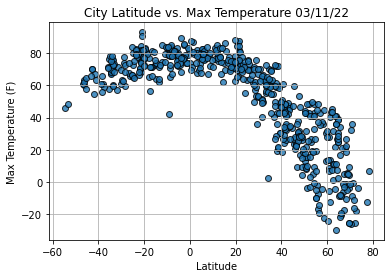

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

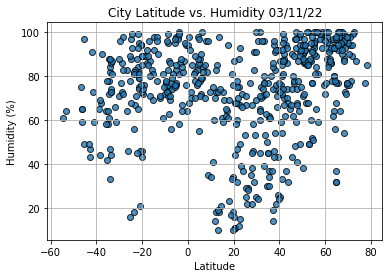

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

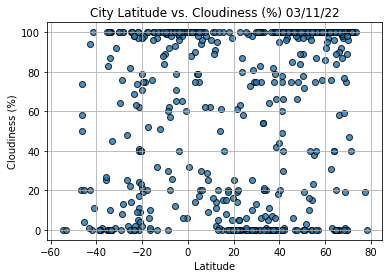

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

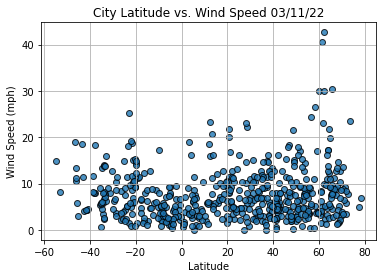

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()